# CASO PRÁCTICO

## Ejercicio 1

Con el csv de acciones de Apple (AAPL.csv), realiza las siguientes visualizaciones:
* **Matplotlib**: Obtén un diagrama de barras de las 5 primeras fechas del dataset para los precios de apertura y cierre.
* **Ggplot**: Realiza una nube de puntos con el volumen de acción y el cierre ajustado, muestra además la línea de ajuste (regresión lineal), entre ambas variables, utiliza un gradiente de color mediante el precio de cierre ajustado.
* **Seaborn 1**: Realiza un mapa de calor mediante la correlación del dataframe
* **Seaborn 2**: Obtén un histograma desactivando la función de densidad
* **Bokeh**: Realiza una gráfica de toda la serie temporal sobre los precios más altos y más bajos, para que se diferencien más las líneas resta 40 puntos a todos los precios más bajos.

### SOLUCIÓN

Importamos todas las librerías y realizamos una pequeña descripción de los datos.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from plotnine import*
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [2]:
df = pd.read_csv('AAPL.csv')

In [3]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,3270.000000,3270.000000,3270.000000,3270.000000,3.270000e+03,3270.000000
mean,151.216673,153.017789,149.103336,151.108138,2.151112e+07,140.505248
std,165.485538,166.815882,163.681717,165.277867,1.482164e+07,165.408965
min,12.990000,13.190000,12.720000,13.120000,1.405000e+06,6.380000
25%,24.592500,25.060000,24.092500,24.712500,1.159570e+07,12.020000
50%,85.415000,86.500000,84.355000,85.340000,1.730015e+07,72.410000
75%,198.957500,200.762500,196.027500,198.010000,2.744490e+07,192.572500
max,702.410000,705.070000,699.570000,702.100000,2.650690e+08,685.760000


In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2000-03-01,118.56,132.06,118.50,130.31,38478000,31.68
1,2000-03-02,127.00,127.94,120.69,122.00,11136800,29.66
2,2000-03-03,124.87,128.23,120.00,128.00,11565200,31.12
3,2000-03-06,126.00,129.13,125.00,125.69,7520000,30.56
4,2000-03-07,126.44,127.44,121.12,122.87,9767600,29.87


In [5]:
print("*CANTIDAD de datos nulos por columna en el dataframe")
print(df.isnull().sum())
print("----------------------------------")
print("*PORCENTAJE de datos nulos por columna en el dataframe")
print(df.isnull().sum()/len(df)*100)

*CANTIDAD de datos nulos por columna en el dataframe
Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64
----------------------------------
*PORCENTAJE de datos nulos por columna en el dataframe
Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Volume       0.0
Adj Close    0.0
dtype: float64


## Matplotlib:
Obtén un diagrama de barras de las 5 primeras fechas del dataset para los precios de apertura y cierre.
Primero se sacan las 5 primeras posiciones del df
los valores de fecha deben ir como tupla

In [6]:
df_ten = df[['Date', 'Open', 'Close']].head(5)
df_ten

,Date,Open,Close
0,2000-03-01,118.56,130.31
1,2000-03-02,127.00,122.00
2,2000-03-03,124.87,128.00
3,2000-03-06,126.00,125.69
4,2000-03-07,126.44,122.87


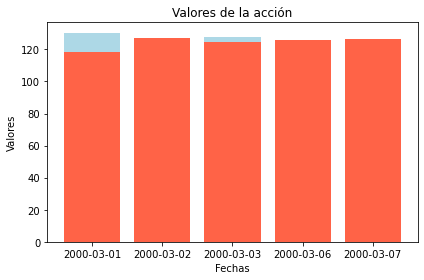

In [7]:
n_groups = len(df_ten)

index = np.arange(n_groups)

max_ = plt.bar(index, df_ten['Close'], color = 'lightblue', label = 'Cierre')
min_ = plt.bar(index, df_ten['Open'], color = 'tomato', label = 'Apertura')

plt.xlabel('Fechas')
plt.ylabel('Valores')
plt.title('Valores de la acción')
plt.xticks(index, tuple(df_ten['Date'].head(5)))

plt.tight_layout()
plt.show()

## Ggplot: 
Realiza una nube de puntos con el volumen de acción y el cierre ajustado, muestra además la línea de ajuste (regresión lineal), entre ambas variables, utiliza un gradiente de color mediante el precio de cierre ajustado.

Simplemente, mostramos dos capas diferentes una con el scatter plot y otra con el ajuste lineal (Evidentemente no hay relación lineal entre ambas variables).

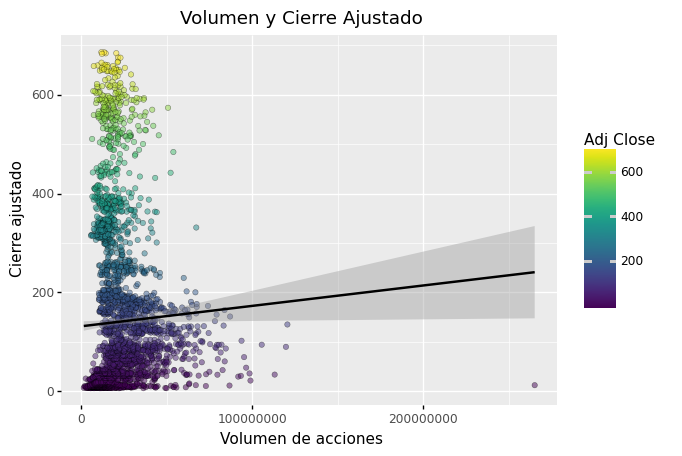

<ggplot: (-9223371952788095100)>

In [8]:
(
    ggplot(df) +
     geom_point(aes(x='Volume', y = 'Adj Close', fill = 'Adj Close'),
        alpha = 0.5,
        shape = 'o',
        size = 2,
        stroke = 0.2)
    + geom_smooth(
        aes(x='Volume', y='Adj Close')
    )
    + labs(title='Volumen y Cierre Ajustado',
          x = 'Volumen de acciones',
          y= 'Cierre ajustado')
)

## Seaborn 1: 
Realiza un mapa de calor mediante la correlación del dataframe

<AxesSubplot:>

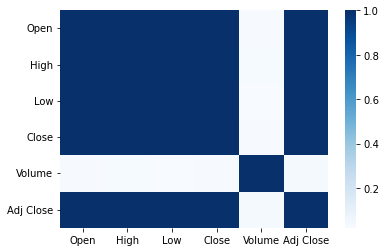

In [9]:
sns.heatmap(df.corr(), cmap='Blues')

## Seaborn 2: 
Obtén un histograma desactivando la función de densidad

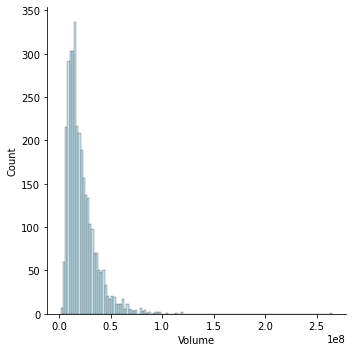

In [10]:
sns.displot(data=df.Volume, color='lightblue', kde=False)

## Bokeh: 
Realiza una gráfica de toda la serie temporal sobre los precios más altos y más bajos, para que se diferencien más las líneas resta 40 puntos a todos los precios más bajos.

Aquí es importante utilizar el formato de fechas adecuado, si simplemente pasamos en el eje x la columna 'Date' no aparecerá nada y es que, debemos cambiar el tipo de las fechas a numpy datetime64.

Finalmente, tenemos que especificar en figure al parámetro x_axis_type que nuestro eje x es formato datetime

In [11]:
output_notebook()

Loading BokehJS ...

In [12]:
correct_dates = np.array(df['Date'], dtype=np.datetime64)

In [13]:
p = figure(plot_width=800, plot_height=400, title = 'Acciones de Apple', x_axis_type = 'datetime')

p.line(correct_dates, df['High'], color = 'blue', line_width=1, line_alpha = 0.5)
p.line(correct_dates, df['Low']-40, color='green', line_width=1, line_alpha=0.5)

p.axis.axis_label='Fechas(array)'
p.yaxis.axis_label='Valor de accion'
show(p)